In [0]:
#Import data file from google drive
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Question 2 | Bayesian Estimation

import numpy as np
import pandas as pd
Data= pd.read_csv('/content/gdrive/My Drive/Datasets/Dataset_3_Team_38.csv')
# n=np.shape(Data)[0]
Data= Data.values[0:100]                 # Taking only first 1000 values
n=np.shape(Data)[0]
sample_mean=np.mean(Data[0:100])

In [0]:
muo= -1
var0= 1/n*(np.dot(np.transpose(Data-muo),(Data-muo)))   #Variance of Prior
print(var0)

[[7.68103897]]


In [0]:
ratio1= 0.1               # Given ratio between variances
ratio2= 1
ratio3= 10
ratio4= 100

var1= ratio1*var0
mu_n1= (((n*var0)/(n*var0+var1))*sample_mean) + (((var1)/(n*var0+var1))*muo)    #Mean of(P(mean|Data))
var_n1= (var0*var1)/(n*var0+var1)      #Variance of(P(mean|Data))

var2= ratio2*var0
mu_n2= (((n*var0)/(n*var0+var2))*sample_mean) + (((var2)/(n*var0+var2))*muo)    #Mean of(P(mean|Data))
var_n2= (var0*var2)/(n*var0+var2)      #Variance of(P(mean|Data))

var3= ratio3*var0
mu_n3= (((n*var0)/(n*var0+var3))*sample_mean) + (((var3)/(n*var0+var3))*muo)    #Mean of(P(mean|Data))
var_n3= (var0*var3)/(n*var0+var3)      #Variance of(P(mean|Data))

var4= ratio4*var0
mu_n4= (((n*var0)/(n*var0+var4))*sample_mean) + (((var4)/(n*var0+var4))*muo)    #Mean of(P(mean|Data))
var_n4= (var0*var4)/(n*var0+var4)      #Variance of(P(mean|Data))

print(var1, var2, var3, var4)
print(mu_n1, mu_n2, mu_n3, mu_n4)
print(var_n1, var_n2, var_n3, var_n4)


[[0.7681039]] [[7.68103897]] [[76.81038972]] [[768.10389716]]
[[0.90744725]] [[0.89045019]] [[0.735777]] [[-0.04532265]]
[[0.00767337]] [[0.07604989]] [[0.69827627]] [[3.84051949]]


In [0]:
def normal(X,var,var_n,mu_n):       #Function to calculate (P(X|Data))
    p = np.exp((-0.5/(var+var_n))*(X-mu_n)**2)/(np.sqrt(2*np.pi*(var+var_n)))
    return(p)

In [0]:
import matplotlib.pyplot as plt
X1= np.arange(-25,25,0.1)
X2= np.arange(-50,50,0.1)
X3= np.arange(-100,100,0.1)
X4= np.arange(-200,200,0.1)

P1 = np.zeros((np.shape(X1)[0]))
for i in range(0,np.shape(X1)[0]):
    P1[i] += normal(X1[i],var1,var_n1,mu_n1)
P2 = np.zeros((np.shape(X2)[0]))
for i in range(0,np.shape(X2)[0]):
    P2[i] += normal(X2[i],var2,var_n2,mu_n2)
P3 = np.zeros((np.shape(X3)[0]))
for i in range(0,np.shape(X3)[0]):
    P3[i] += normal(X3[i],var3,var_n3,mu_n3)
P4 = np.zeros((np.shape(X4)[0]))
for i in range(0,np.shape(X4)[0]):
    P4[i] += normal(X4[i],var4,var_n4,mu_n4)

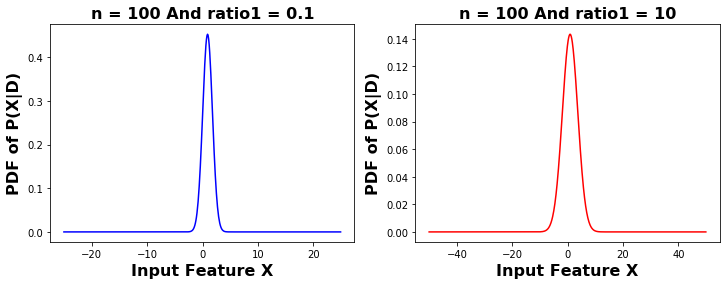

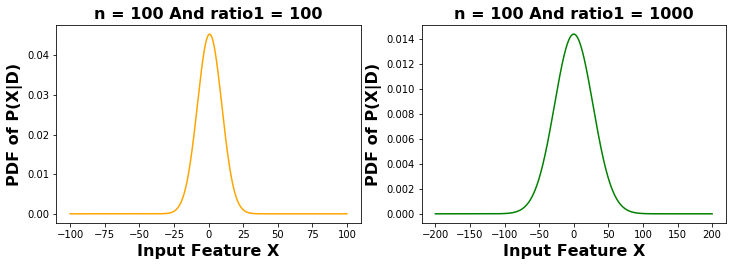

In [0]:
plt.figure(1, figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(X1,P1,color = 'blue')
plt.xlabel('Input Feature X', fontweight="bold", fontsize=16)
plt.ylabel('PDF of P(X|D)', fontweight="bold", fontsize=16)
plt.title('n = 100 And ratio1 = 0.1', fontweight="bold", fontsize=16)       #change the value of n accordingly from 10 to 100 to 1000

# # plt.figure(2)
plt.subplot(1,2,2)
plt.plot(X2,P2,color = 'red')
plt.xlabel('Input Feature X', fontweight="bold", fontsize=16)
plt.ylabel('PDF of P(X|D)', fontweight="bold", fontsize=16)
plt.title('n = 100 And ratio1 = 10', fontweight="bold", fontsize=16)

plt.figure(2, figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(X3,P3,color = 'orange')
plt.xlabel('Input Feature X', fontweight="bold", fontsize=16)
plt.ylabel('PDF of P(X|D)', fontweight="bold", fontsize=16)
plt.title('n = 100 And ratio1 = 100', fontweight="bold", fontsize=16)

# plt.figure(4)
plt.subplot(2,2,2)
plt.plot(X4,P4,color = 'green')
plt.xlabel('Input Feature X', fontweight="bold", fontsize=16)
plt.ylabel('PDF of P(X|D)', fontweight="bold", fontsize=16)
plt.title('n = 100 And ratio1 = 1000', fontweight="bold", fontsize=16)
plt.savefig('100b1.png')
files.download('100b1.png')
